In [1]:
import pandas as pd
import os
import shutil
import sys
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
from tensorflow import keras
import tensorflow


import tensorflow as tf

from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [2]:
# print(tf.__version__) # MacPro Amin 1.13.1

In [3]:
# !pip3 install visualkeras
# !/Users/amin/anaconda3/bin/python -m pip install visualkeras

In [4]:
import visualkeras

In [6]:
# inserting the parent directory into current path
# sys.path.insert(1, '../COVID_19/')
sys.path.insert(1, '../DeepNet_4_class_classification_Project/')

In [8]:
# path_1 = 'C:/Users/DASLAB Hareland 3/Desktop/COVID_19/Codes/Models/model_covid_test_4classes_82percent.h5'
path_1 = '../Codes/Models/model_4_class-03-0.77-0.91-checkpoint.h5'

#### here I have a compatibility issue. The TensorFlow I used to save the model's version is different from the current machine so I cant upload the model using the old one. I get error like the following. 


```python
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-16-c6e6d4dabf77> in <module>()
----> 1 model = keras.models.load_model(path_1)

~/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/saving.py in load_model(filepath, custom_objects, compile)
    232       raise ValueError('No model found in config file.')
    233     model_config = json.loads(model_config.decode('utf-8'))
--> 234     model = model_from_config(model_config, custom_objects=custom_objects)
    235 
    236     # set weights
.
.
.
.
.
ValueError: ('Unrecognized keyword arguments:', dict_keys(['ragged']))
```

In such a case, you may save the model weights in the first version and use it for the new model in a different version and then use it for visualization of CNN layers.

In [9]:
model = keras.models.load_model(path_1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


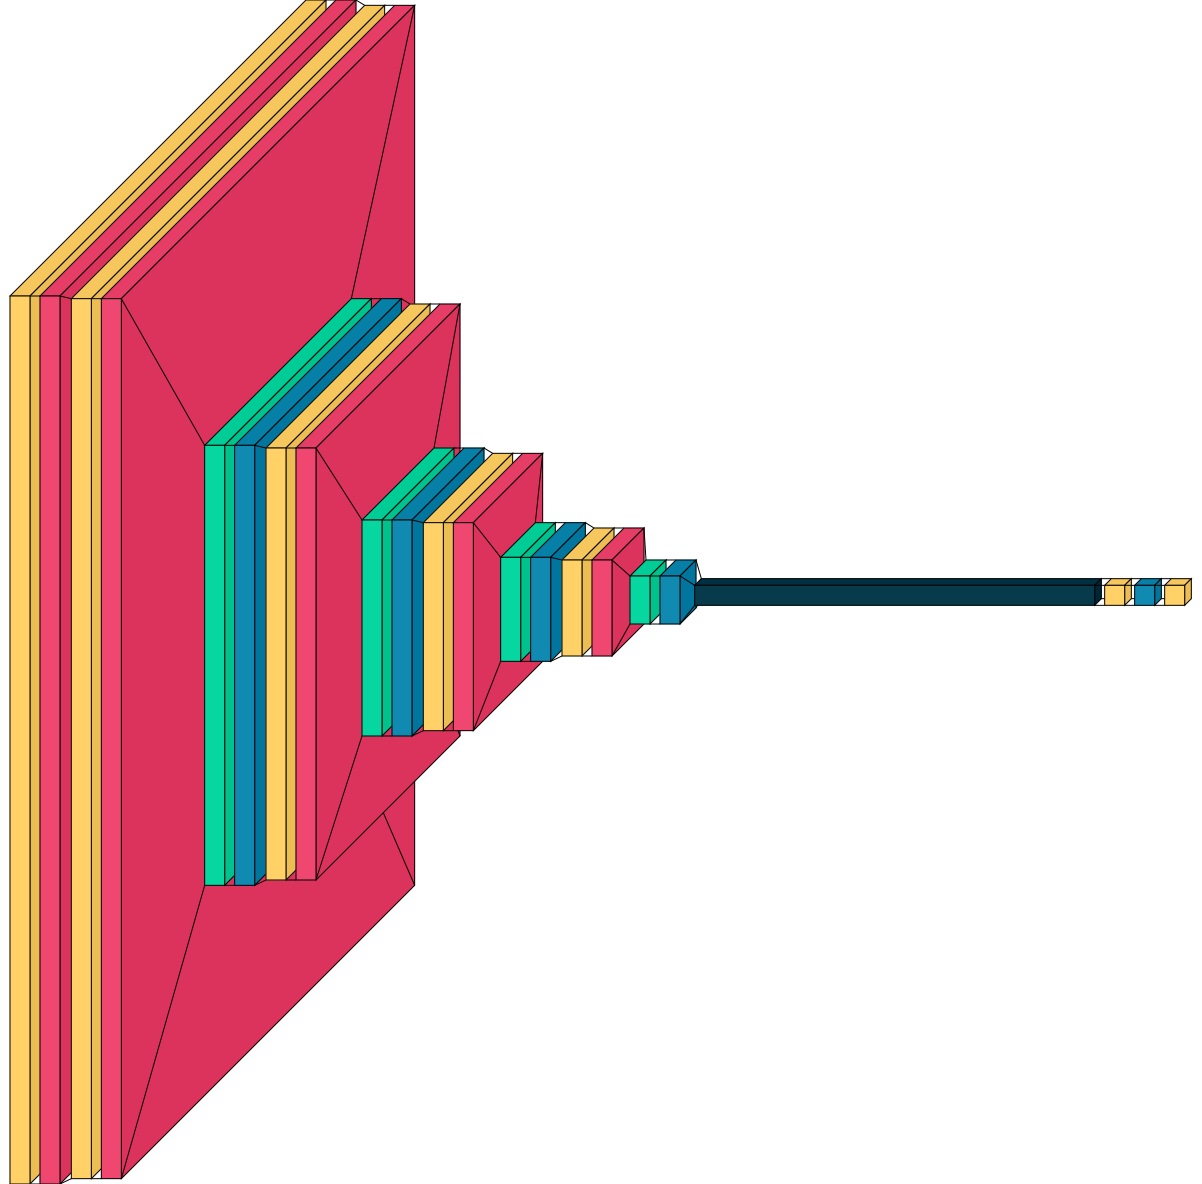

In [10]:
path_to_save_img = '../Figures/CNN_4class.png'

# visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file=path_to_save_img) # write to disk
# visualkeras.layered_view(model, to_file='output.png').show() # write and show
# visualkeras.layered_view(model)

### Visualize convolutional filter outputs in your deep learning mode

I used the following youtube toturial.
[here](https://www.youtube.com/watch?v=ho6JXE3EbZ8&t=440s)

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization_v1 (Batc (None, 222, 222, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 220, 220, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
__________

In [12]:
layer = model.layers
print('Number of layers = ', len(layer))

Number of layers =  22


In [13]:
#Understand the filters in the model 
#Let us pick the first hidden layer as the layer of interest.
layer = model.layers #Conv layers at 0,2,6,10,14,...
filters, biases = model.layers[0].get_weights()
print(layer[0].name, filters.shape)

conv2d (3, 3, 3, 32)


We have 64 filters 3 x 3 size and 3 colors (RGB). Lets check them out below.

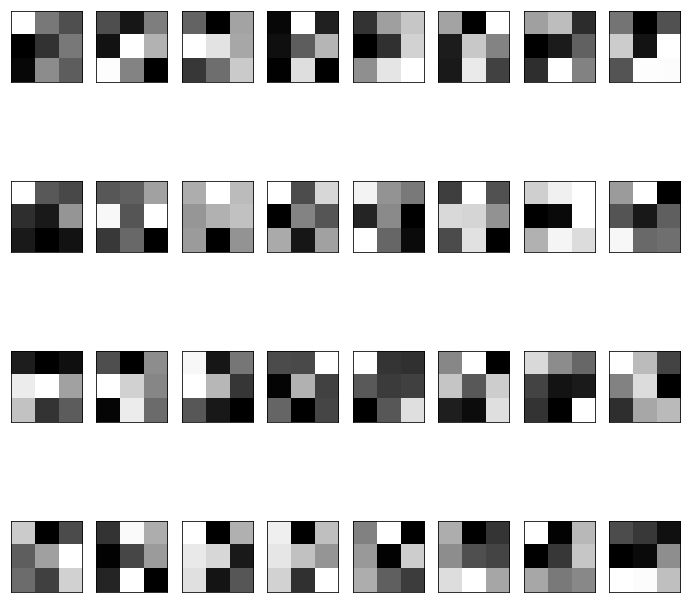

In [14]:
# plot filters
fig1=plt.figure(figsize=(12, 12))
columns = 8
rows = 4
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show() 

#### Define a new truncated model to only include the conv layers of interest

In [15]:
#conv_layer_index = [0,2,6,...]
conv_layer_index = [0,2,6,10,14]  #TO define a shorter model
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization_v1 (Batc (None, 222, 222, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 220, 220, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
__________

Load image considering the input dimension needed for first layer

```
conv2d (Conv2D)              (None, 222, 222, 32)      896       
```

In [16]:
path_to_img = '../Dataset_4_classe/Train/Covid/5f619d7e.jpg'

#Input shape to the model is 224 x 224. SO resize input image to this shape.
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = load_img(path_to_img, target_size=(224, 224)) #VGG user 224 as input

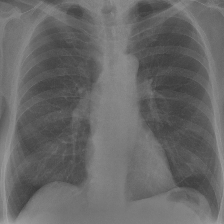

In [17]:
img

In [18]:
# convert the image to an array
img = img_to_array(img)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)

# Generate feature output by predicting on the input image
feature_output = model_short.predict(img)

In [19]:
len(feature_output)

5

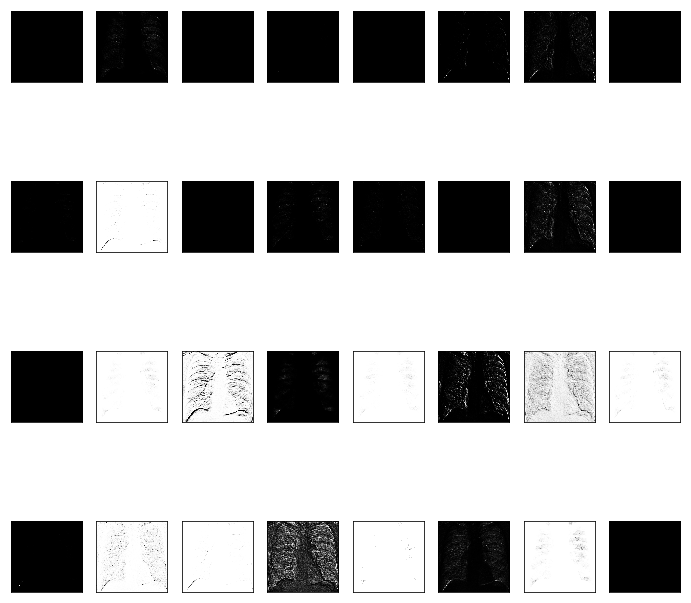

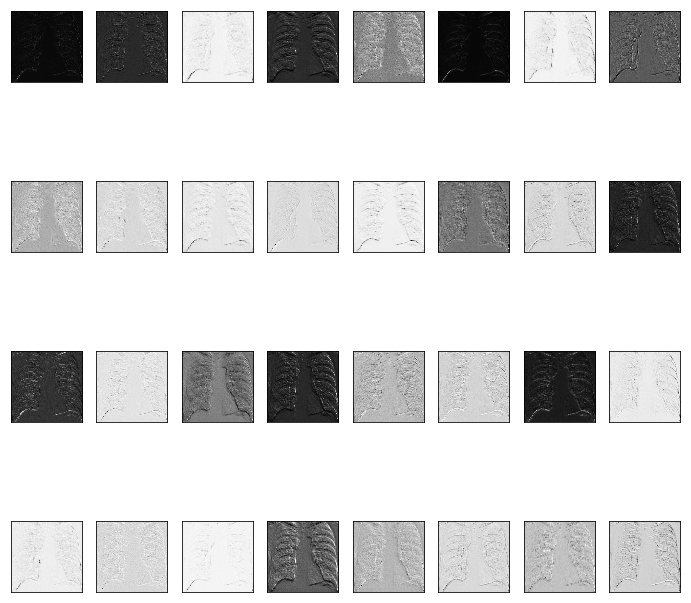

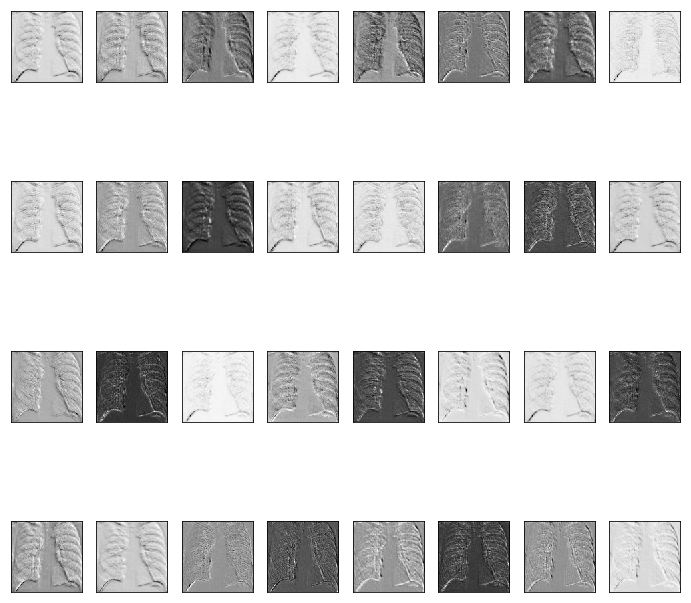

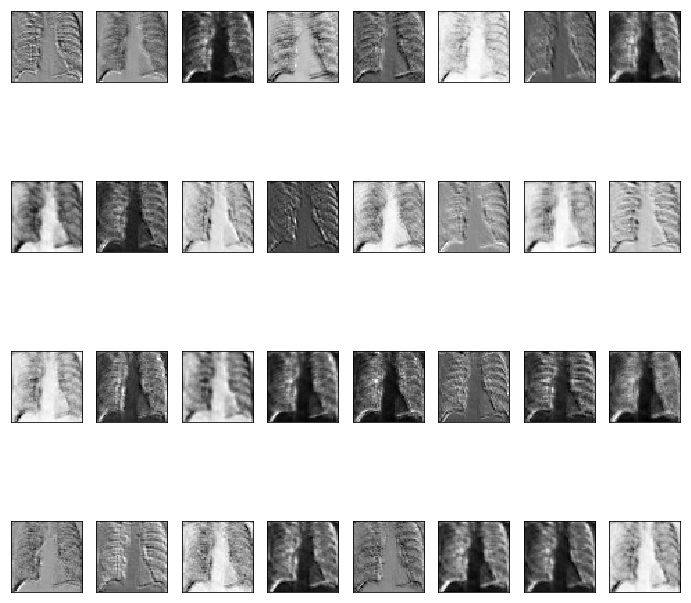

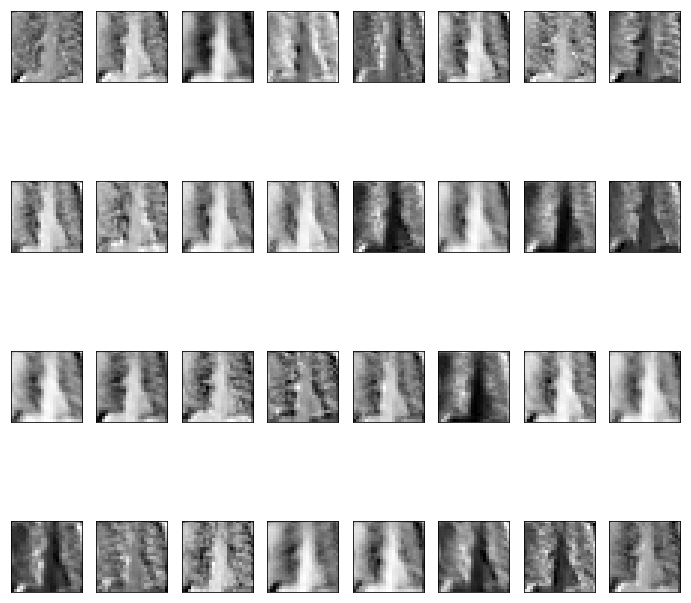

In [21]:
columns = 8
rows = 4
for lay_num, ftr in enumerate(feature_output):
    #pos = 1
    fig=plt.figure(figsize=(12, 12))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
        
        #pos += 1
        
        
#     path_to_save_img = '../Figures/CNN_4class.png'
    plt.savefig(f"../Assets/COVID_Conv_layer_{lay_num}_viz.png")
        
        
plt.show()

#### Now Check out the healthy X-ray image and see how CNN sees it.

In [28]:
path_to_img = '../Dataset_4_classe/Train/NORMAL/IM-0383-0001.jpeg'

#Input shape to the model is 224 x 224. SO resize input image to this shape.
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = load_img(path_to_img, target_size=(224, 224)) #VGG user 224 as input

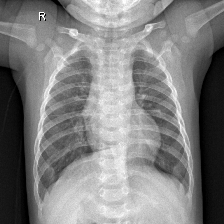

In [29]:
img

In [30]:
# convert the image to an array
img = img_to_array(img)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)

# Generate feature output by predicting on the input image
feature_output = model_short.predict(img)

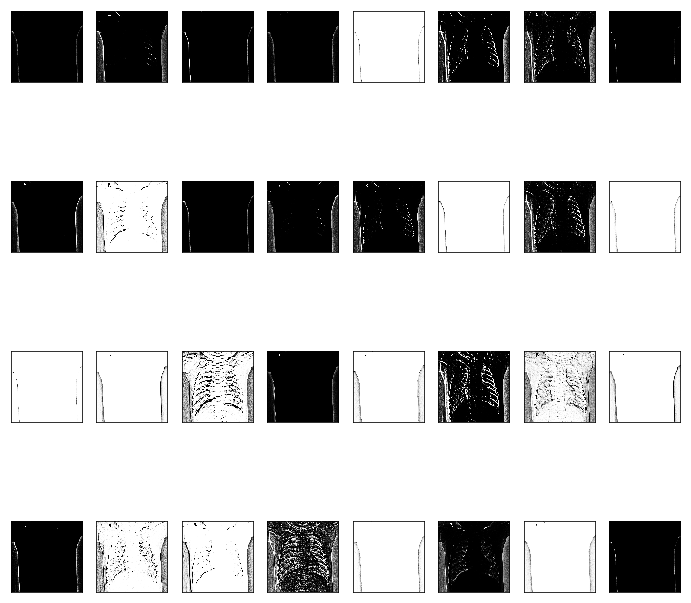

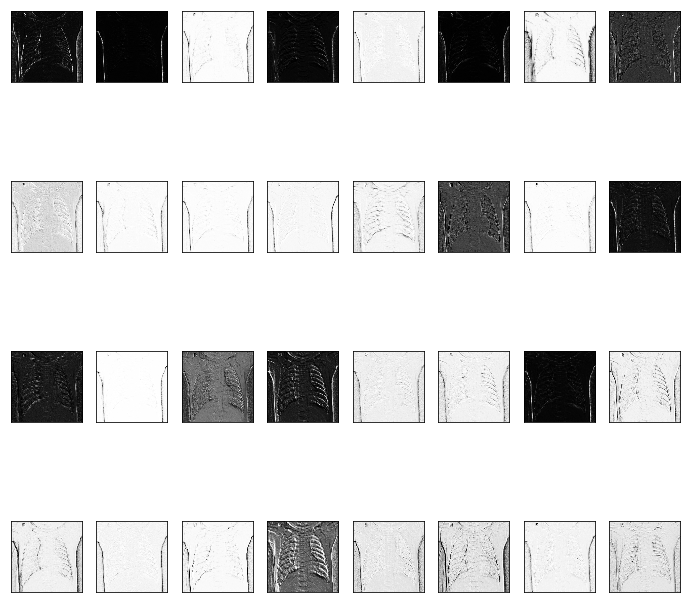

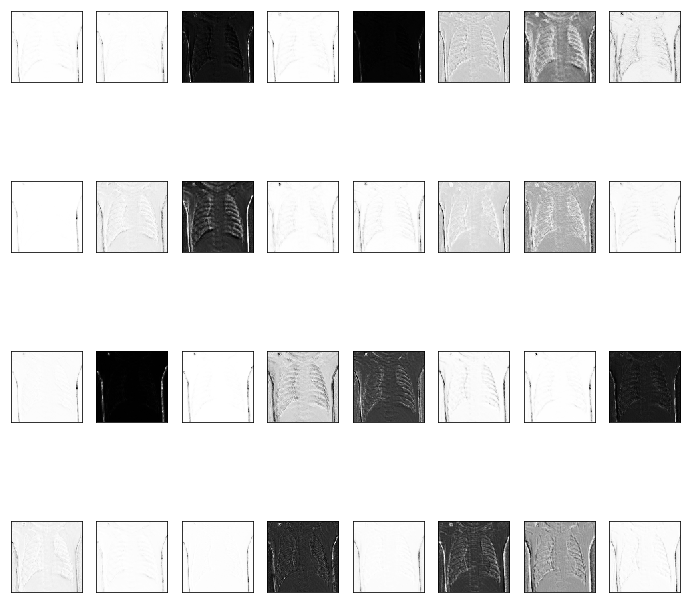

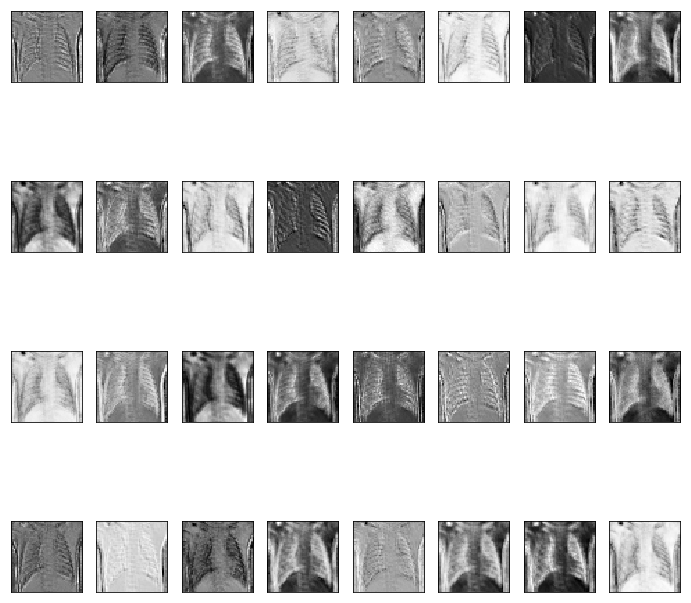

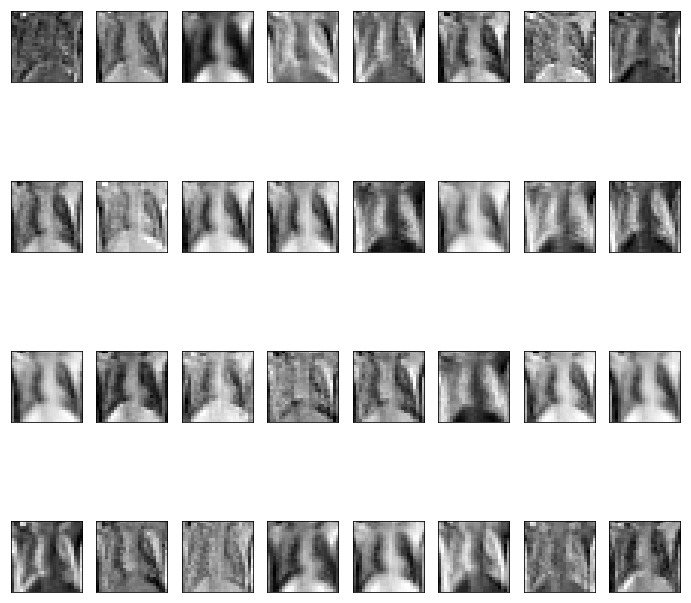

In [31]:
columns = 8
rows = 4
for lay_num, ftr in enumerate(feature_output):
    #pos = 1
    fig=plt.figure(figsize=(12, 12))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
        
        #pos += 1
        
        
#     path_to_save_img = '../Figures/CNN_4class.png'
    plt.savefig(f"../Assets/Normal_Conv_layer_{lay_num}_viz.png")
        
        
plt.show()

#### Now Check out the Pneumocystis  X-ray image and see how CNN sees it.

In [32]:
path_to_img = '../Dataset_4_classe/Train/Pneumocystis/000001-1.png'

#Input shape to the model is 224 x 224. SO resize input image to this shape.
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = load_img(path_to_img, target_size=(224, 224)) #VGG user 224 as input

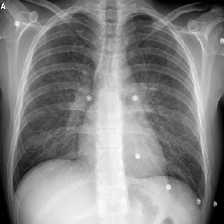

In [33]:
img

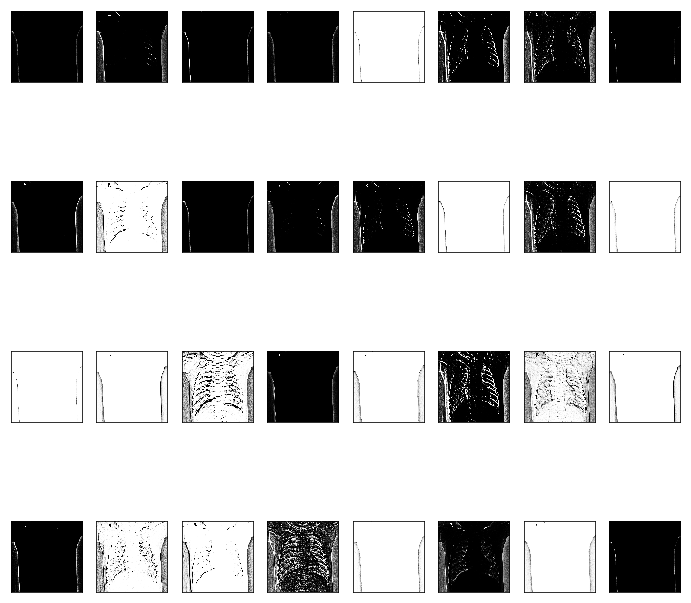

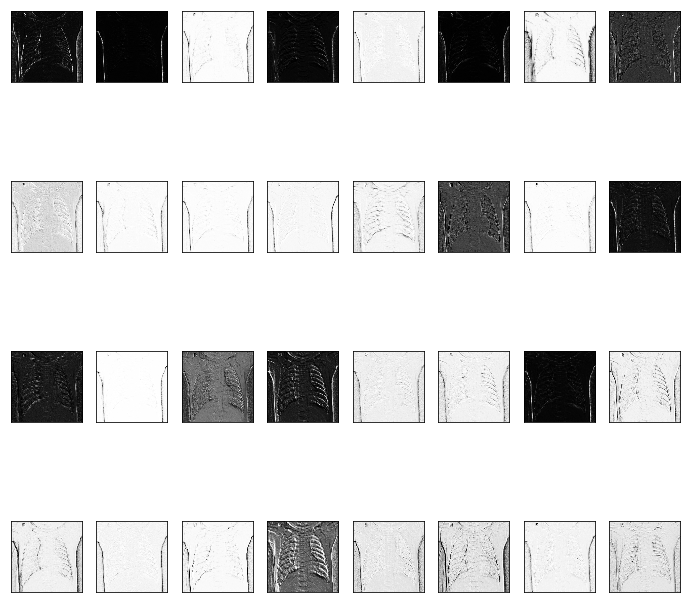

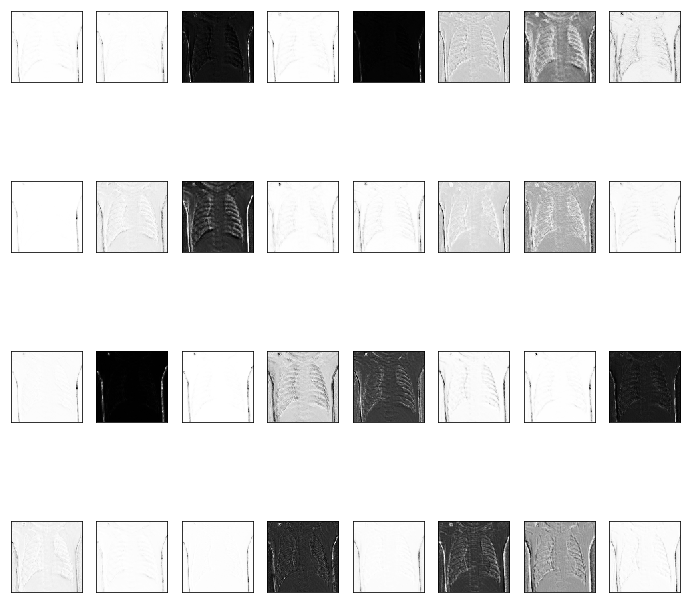

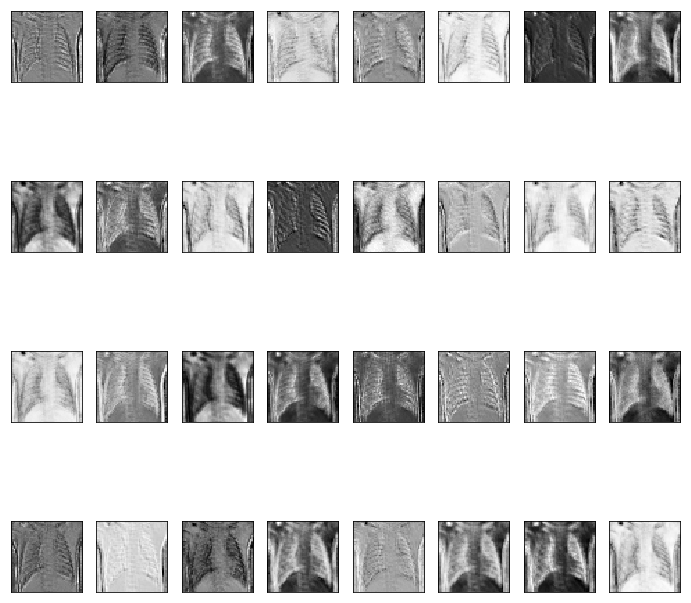

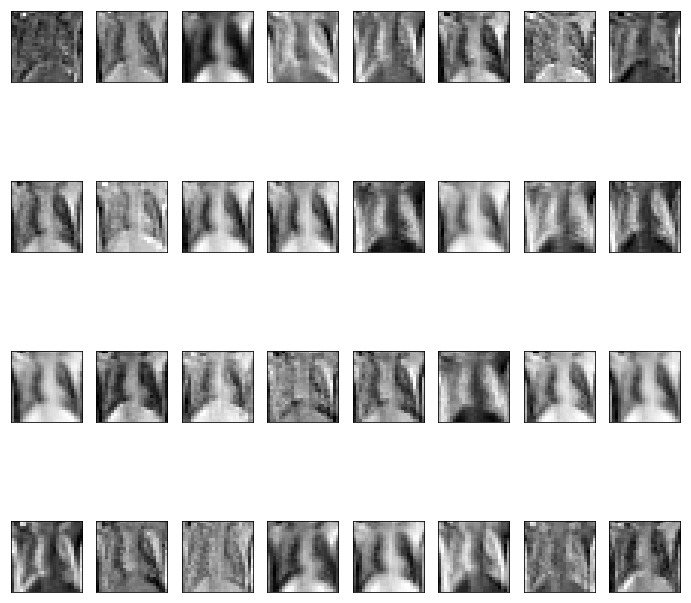

In [34]:
columns = 8
rows = 4
for lay_num, ftr in enumerate(feature_output):
    #pos = 1
    fig=plt.figure(figsize=(12, 12))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
        
        #pos += 1
        
        
#     path_to_save_img = '../Figures/CNN_4class.png'
    plt.savefig(f"../Assets/Pneumocystis_Conv_layer_{lay_num}_viz.png")
        
        
plt.show()

#### Now Check out the Streptococcus  X-ray image and see how CNN sees it.

In [35]:
path_to_img = '../Dataset_4_classe/Train/Streptococcus/2fc8a7c61c76f13ee7f9306b44e792_jumbo.jpg'

#Input shape to the model is 224 x 224. SO resize input image to this shape.
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = load_img(path_to_img, target_size=(224, 224)) #VGG user 224 as input

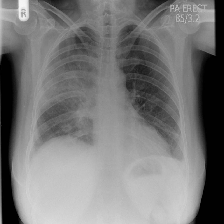

In [36]:
img

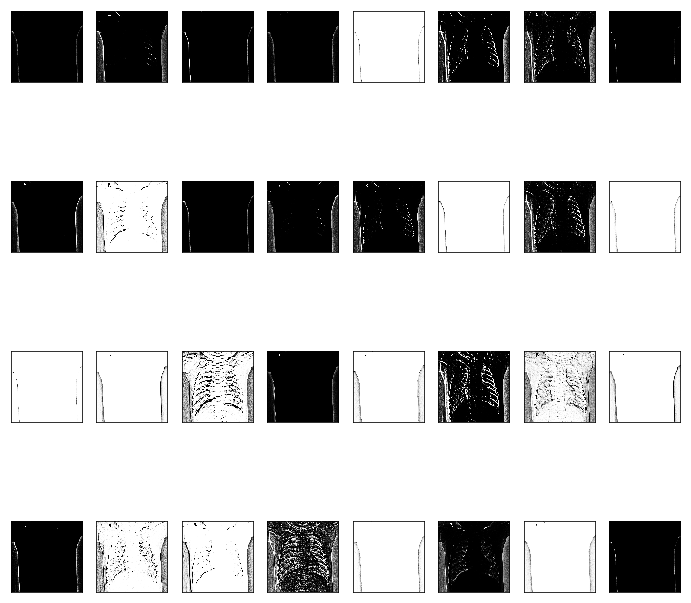

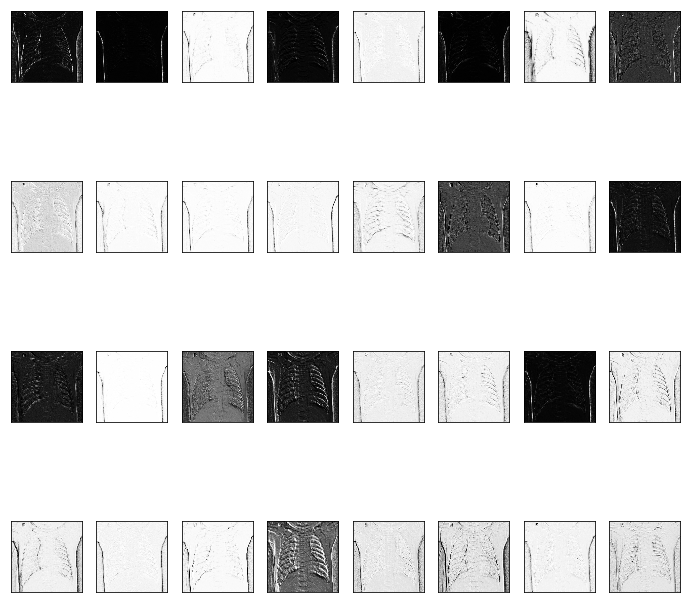

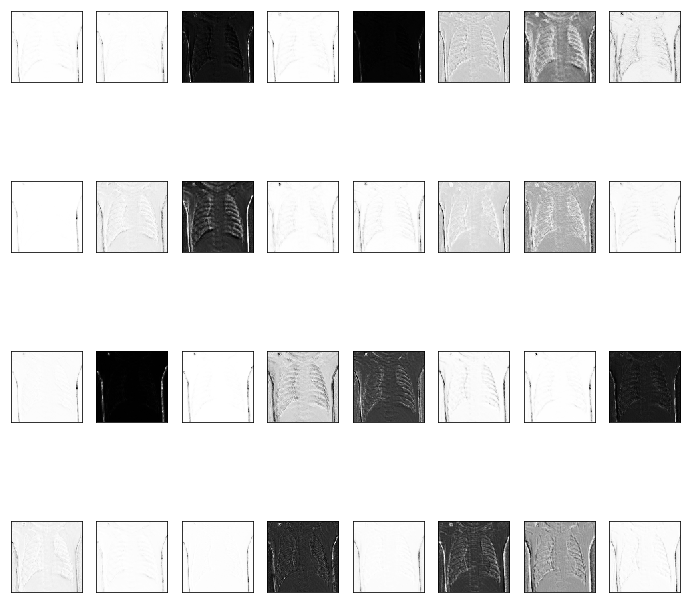

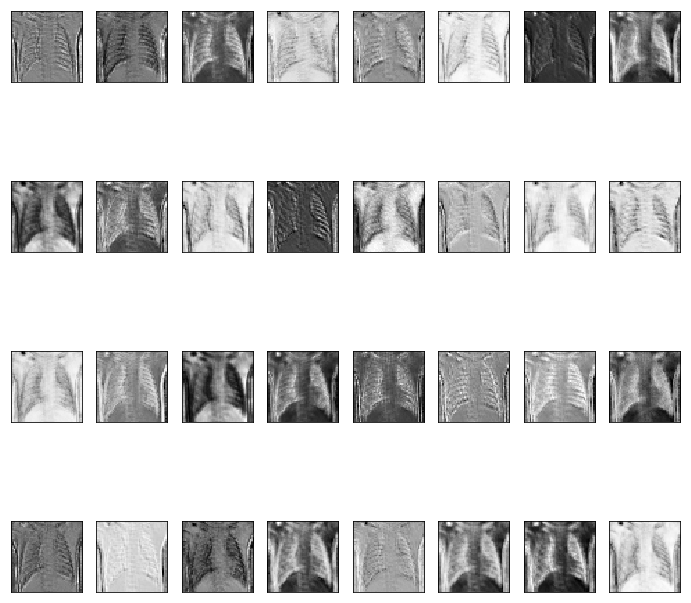

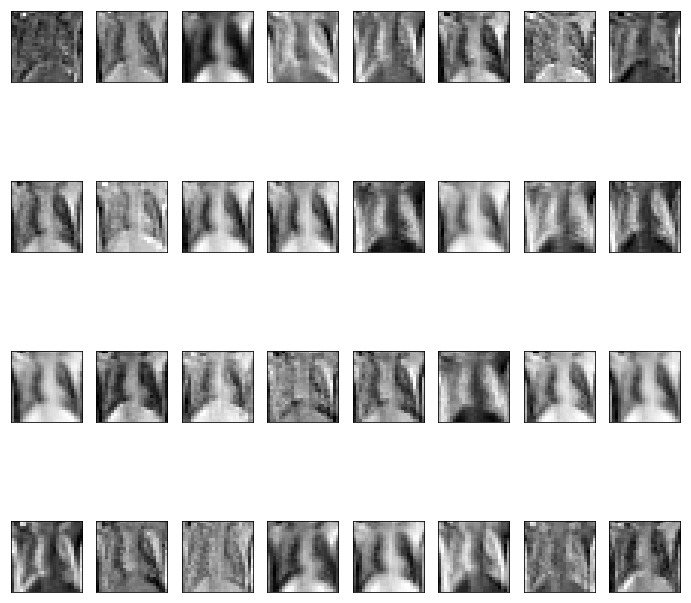

In [37]:
columns = 8
rows = 4
for lay_num, ftr in enumerate(feature_output):
    #pos = 1
    fig=plt.figure(figsize=(12, 12))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
        
        #pos += 1
        
        
#     path_to_save_img = '../Figures/CNN_4class.png'
    plt.savefig(f"../Assets/Streptococcus_Conv_layer_{lay_num}_viz.png")
        
        
plt.show()

Done.